# Retail Sales Data Analysis


---

## Install Dependencies:

In [28]:
# Import the following libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set(style="whitegrid")

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Load the CSV from Google Drive (adjust path as needed)
file_path = '/content/drive/MyDrive/Github Projects/retail_sales_dataset.csv'  # Update this if in a subfolder
df = pd.read_csv(file_path)
print("Dataset loaded successfully!")
print(df.head())  # Preview first 5 rows
print(df.info())  # Check data types and non-null counts

Dataset loaded successfully!
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date    

## Data Cleaning:


---


* Convert Date to datetime.

* Check for missing values and duplicates.

* Add a Month-Year column for time-based analysis.

In [31]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# If there are duplicates, drop them (uncomment if needed)
# df = df.drop_duplicates()

# Basic stats
print("Descriptive statistics:\n", df.describe())

# Add a new column for Month-Year for time-based analysis
df['Month-Year'] = df['Date'].dt.to_period('M')

Missing values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Duplicate rows: 0
Descriptive statistics:
        Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   


## Bar plot: Total sales by product category.

/tmp/ipython-input-1269445337.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product Category', y='Total Amount', data=df, estimator=sum, ci=None)


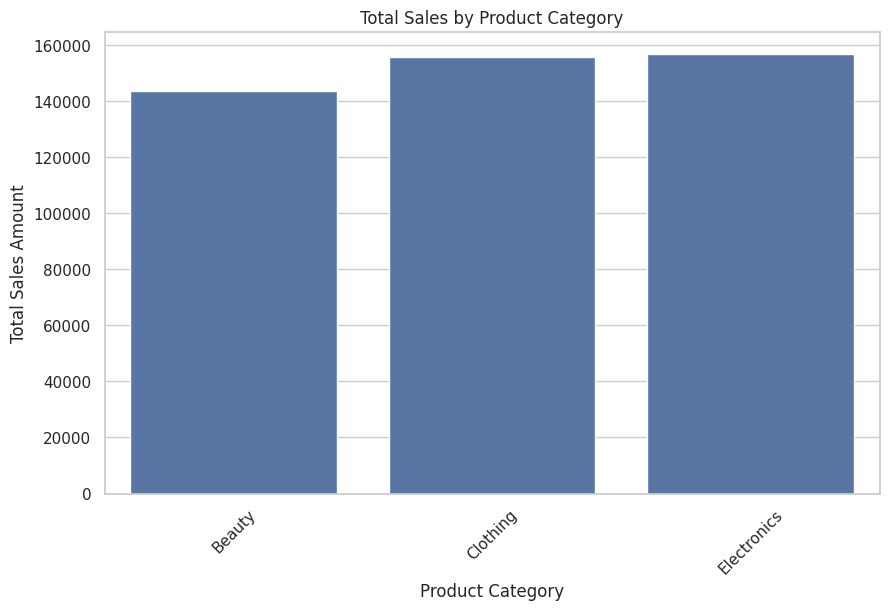

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

## Box plot: Sales distribution by gender.


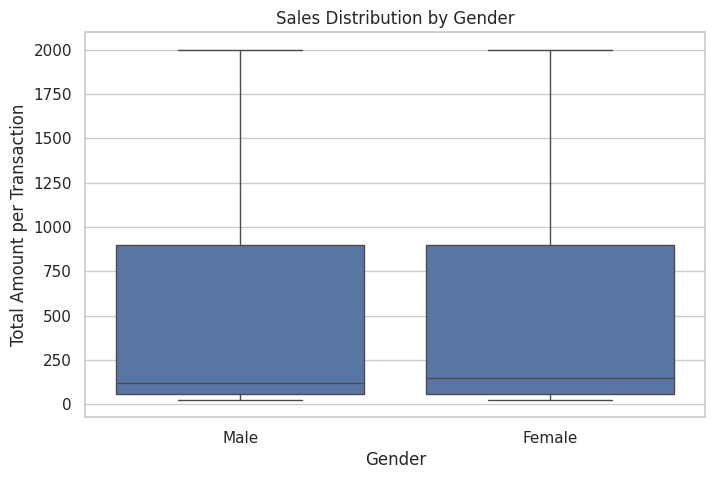

In [33]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gender', y='Total Amount', data=df)
plt.title('Sales Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Amount per Transaction')
plt.show()

## Line plot: Total sales over time (monthly).


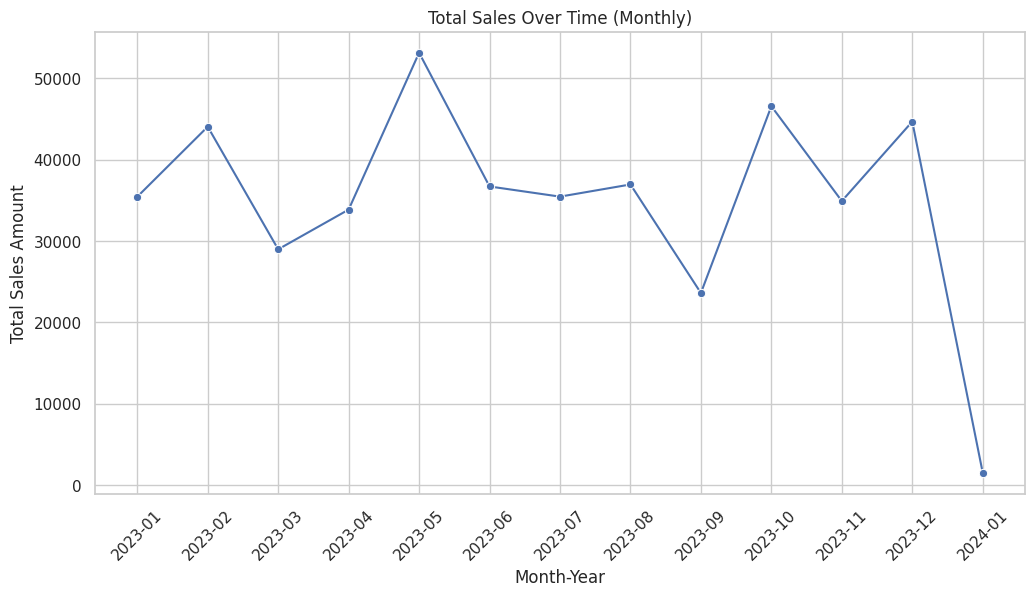

In [34]:
monthly_sales = df.groupby('Month-Year')['Total Amount'].sum().reset_index()
monthly_sales['Month-Year'] = monthly_sales['Month-Year'].astype(str)  # For plotting

plt.figure(figsize=(12, 6))
sns.lineplot(x='Month-Year', y='Total Amount', data=monthly_sales, marker='o')
plt.title('Total Sales Over Time (Monthly)')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

## Histogram: Customer age distribution.


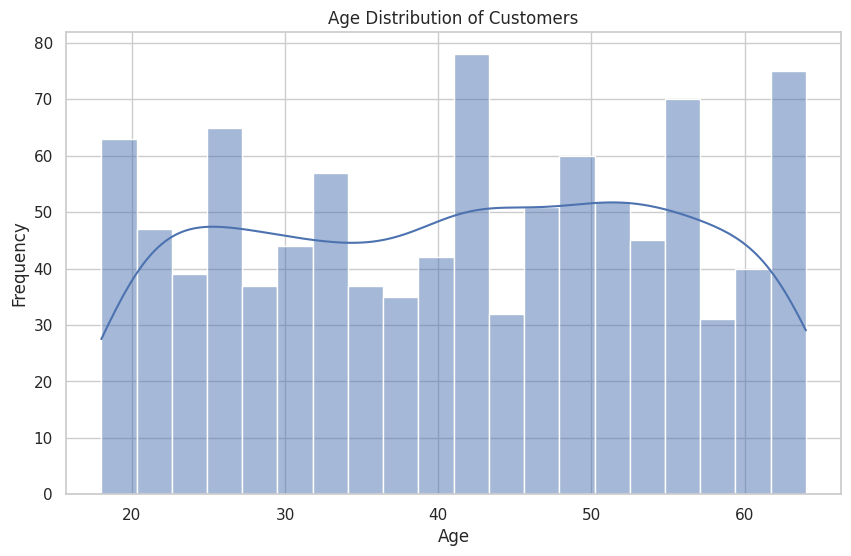

In [35]:
# Cell 6: Visualization 3 - Age Distribution of Customers
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Heatmap: Correlation between numerical features.

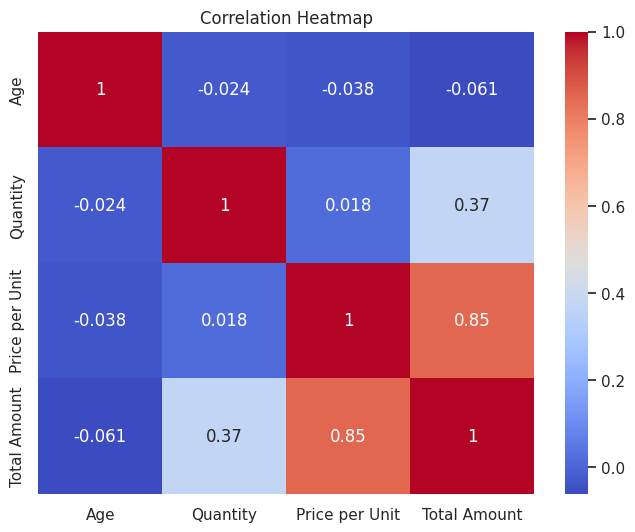

In [36]:
numerical_df = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]
corr = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Insights:


---

* Top-selling product category.

* Average spend by gender.

* Most common customer age.

* Total overall sales.

* Peak sales month.

In [37]:
# Insight 1: Top-selling product category
top_category = df.groupby('Product Category')['Total Amount'].sum().idxmax()
total_in_top = df.groupby('Product Category')['Total Amount'].sum().max()
print(f"Top-selling category: {top_category} with total sales of ${total_in_top:.2f}")

# Insight 2: Average spend by gender
avg_spend_gender = df.groupby('Gender')['Total Amount'].mean()
print("Average spend by gender:\n", avg_spend_gender)

# Insight 3: Most common age group
common_age = df['Age'].mode()[0]
print(f"Most common customer age: {common_age}")

# Insight 4: Total overall sales
total_sales = df['Total Amount'].sum()
print(f"Overall total sales: ${total_sales:.2f}")

# Insight 5: Peak sales month
peak_month = monthly_sales.loc[monthly_sales['Total Amount'].idxmax(), 'Month-Year']
print(f"Peak sales month: {peak_month}")

Top-selling category: Electronics with total sales of $156905.00
Average spend by gender:
 Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64
Most common customer age: 43
Overall total sales: $456000.00
Peak sales month: 2023-05
